In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [39]:
veriseti1 = pd.read_csv("C:/Users/casper/Desktop/DataScience/Veriseti1.txt")
veriseti2 = pd.read_csv("C:/Users/casper/Desktop/DataScience/Veriseti2.txt")

train_df = pd.concat([veriseti1,veriseti2], ignore_index=True)
train_df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
1,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
2,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
3,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
4,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [40]:
test_df = pd.read_csv("C:/Users/casper/Desktop/DataScience/Veriseti3.txt")
test_df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-11 14:48:00,21.7600,31.133333,437.333333,1029.666667,0.005021,1
2,2015-02-11 14:49:00,21.7900,31.000000,437.333333,1000.000000,0.005009,1
3,2015-02-11 14:50:00,21.7675,31.122500,434.000000,1003.750000,0.005022,1
4,2015-02-11 14:51:00,21.7675,31.122500,439.000000,1009.500000,0.005022,1
5,2015-02-11 14:51:59,21.7900,31.133333,437.333333,1005.666667,0.005030,1


In [41]:
train_df.info()  # train hakkında özet bilgi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10808 entries, 0 to 10807
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           10808 non-null  object 
 1   Temperature    10808 non-null  float64
 2   Humidity       10808 non-null  float64
 3   Light          10808 non-null  float64
 4   CO2            10808 non-null  float64
 5   HumidityRatio  10808 non-null  float64
 6   Occupancy      10808 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 591.2+ KB


In [61]:
test_df.info()  # test hakkında özet bilgi

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9752 entries, 1 to 9752
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           9752 non-null   object 
 1   Temperature    9752 non-null   float64
 2   Humidity       9752 non-null   float64
 3   Light          9752 non-null   float64
 4   CO2            9752 non-null   float64
 5   HumidityRatio  9752 non-null   float64
 6   Occupancy      9752 non-null   int64  
 7   Humidity_x     9752 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 685.7+ KB


In [42]:
# Hedef parametre Occupancy nin nasıl verilerden oluştuğu hakkında bilgi

set(train_df["Occupancy"])

{0, 1}

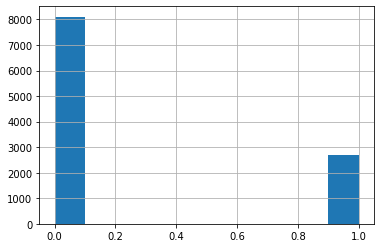

In [43]:
# Hedef parametre Occupancy nin eğitim verisi içinde nasıl bir dağılımı olduğunun görseli

train_df["Occupancy"].hist();

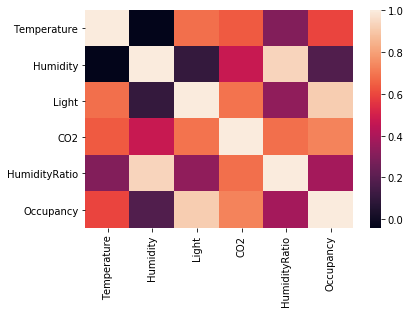

In [44]:
corr = train_df.corr()  # Veri seti içerisindeki tüm feature ların birbirleriyle olan ilişkisinin grafiği
sns.heatmap(corr)

In [45]:
# Hedef parametrenin korelasyon verisi

Hedef_param = train_df.corrwith(train_df["Occupancy"]).sort_values(ascending=False) 
print("Occupancy e göre korelasyon :",Hedef_param)

Occupancy e göre korelasyon : Occupancy        1.000000
Light            0.915363
CO2              0.729540
Temperature      0.595005
HumidityRatio    0.386346
Humidity         0.183020
dtype: float64


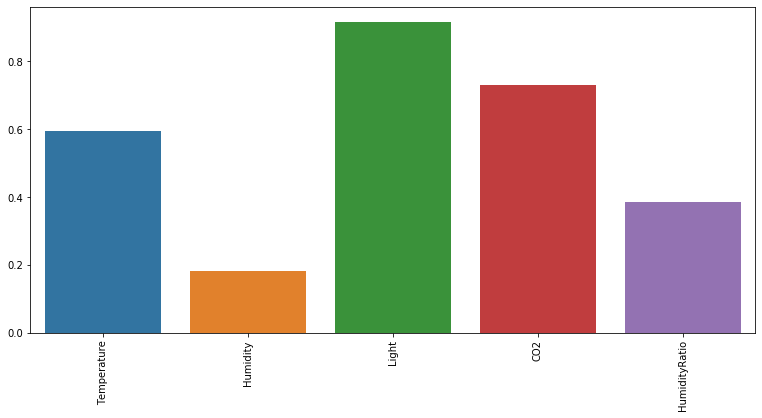

In [46]:
# Hedef parametrenin korelasyon verisinin grafiği

hs_sale = train_df.corrwith(train_df["Occupancy"]).drop("Occupancy")
plt.figure(figsize=(13,6))
g = sns.barplot(x=hs_sale.index, y=hs_sale.values);
g.set_xticklabels(g.get_xticklabels(), rotation=90);

In [47]:
# Yeni nitelik ekleme 

train_df['Humidity_x'] = train_df['Humidity'] * train_df['HumidityRatio']
test_df['Humidity_x'] = test_df['Humidity'] * test_df['HumidityRatio']


In [48]:
train_df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,Humidity_x
0,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1,0.130714
1,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1,0.130432
2,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1,0.130216
3,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1,0.129785
4,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1,0.129390


In [49]:
test_df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,Humidity_x
1,2015-02-11 14:48:00,21.7600,31.133333,437.333333,1029.666667,0.005021,1,0.156321
2,2015-02-11 14:49:00,21.7900,31.000000,437.333333,1000.000000,0.005009,1,0.155266
3,2015-02-11 14:50:00,21.7675,31.122500,434.000000,1003.750000,0.005022,1,0.156284
4,2015-02-11 14:51:00,21.7675,31.122500,439.000000,1009.500000,0.005022,1,0.156284
5,2015-02-11 14:51:59,21.7900,31.133333,437.333333,1005.666667,0.005030,1,0.156610


In [50]:
# Hedef parametrenin korelasyon verisi

Hedef_param1 = train_df.corrwith(train_df["Occupancy"]).sort_values(ascending=False) 
print("Occupancy e göre korelasyon :",Hedef_param1)

Occupancy e göre korelasyon : Occupancy        1.000000
Light            0.915363
CO2              0.729540
Temperature      0.595005
HumidityRatio    0.386346
Humidity_x       0.298211
Humidity         0.183020
dtype: float64


In [51]:
X_train = train_df.drop(columns=["date", "Occupancy"])
y_train = train_df["Occupancy"]

X_test = test_df.drop(columns=["date", "Occupancy"])
y_test = test_df["Occupancy"]

In [52]:
X_train

,Temperature,Humidity,Light,CO2,HumidityRatio,Humidity_x
0,23.180000,27.272000,426.0,721.25,0.004793,0.130714
1,23.150000,27.267500,429.5,714.00,0.004783,0.130432
2,23.150000,27.245000,426.0,713.50,0.004779,0.130216
3,23.150000,27.200000,426.0,708.25,0.004772,0.129785
4,23.100000,27.200000,426.0,704.50,0.004757,0.129390
...,...,...,...,...,...,...
10803,24.290000,25.700000,808.0,1150.25,0.004829,0.124107
10804,24.330000,25.736000,809.8,1129.20,0.004848,0.124758
10805,24.330000,25.700000,817.0,1125.80,0.004841,0.124407
10806,24.356667,25.700000,813.0,1123.00,0.004849,0.124608


In [54]:
y_test

1       1
2       1
3       1
4       1
5       1
       ..
9748    1
9749    1
9750    1
9751    1
9752    1
Name: Occupancy, Length: 9752, dtype: int64

In [55]:
# Grid Search / en uygun hiper parametrelerin tahlili

from sklearn.model_selection import GridSearchCV

# Model
rf_df = RandomForestClassifier()

params_rf = {"max_depth": [2, 5, 10],
             "max_samples": [.5, .7, 1],
             "max_features": [.6, 1],
             "n_estimators": [5, 10, 20]}

grid_rf = GridSearchCV(estimator=rf_df, param_grid=params_rf, scoring="accuracy", cv=5)
grid_rf.fit(X=X_train, y=y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [56]:
grid_rf.best_params_ # Elde edilebilecek en iyi skor için gerekli hiperparametreler

{'max_depth': 2, 'max_features': 0.6, 'max_samples': 0.5, 'n_estimators': 5}

In [57]:
grid_rf.best_score_ 

0.9791831992674787

Accuracy Score: 0.9871821164889254


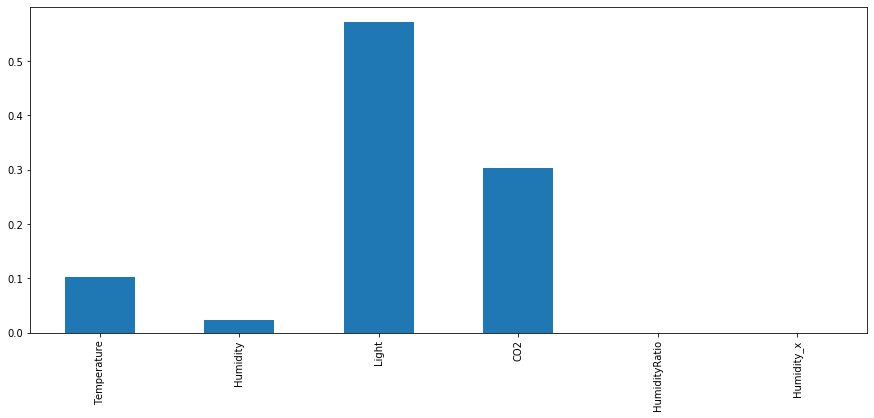

In [58]:
# Modeli egitimi

rf_df = RandomForestClassifier(max_depth= 2, max_features= 0.6, max_samples= 0.5, n_estimators=5,random_state=42)
rf_df.fit(X=X_train, y=y_train)

# Predict

y_pred = rf_df.predict(X=X_test)
print("Accuracy Score:", accuracy_score(y_true=y_test, y_pred=y_pred))


# Feature importance cizdirilmesi.

fi = pd.Series(data=rf_df.feature_importances_, index=X_train.keys())
plt.figure(figsize=(15,6))
fi.plot.bar();

In [59]:
# confusion matrix gösterimi                            # [True negative , False positive]
                                                        # [False negative , True positive] 

cnfm = confusion_matrix(y_true=y_test, y_pred=y_pred)   # True negative :0 a 0 sonucu , False positive :0 a 1 demek 
cnfm                                                    # False negative:1 e 0 demek , True positive : 1 e 1 demek

array([[7589,  114],
       [  11, 2038]], dtype=int64)

In [60]:
print(classification_report(y_true=y_test, y_pred=y_pred)) # 0 ile 1 arasında değerer gelir
                                                           # 1 e yaklaştıkça modeliğin iyi sonuç verdiği anlaşılır.

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      7703
           1       0.95      0.99      0.97      2049

    accuracy                           0.99      9752
   macro avg       0.97      0.99      0.98      9752
weighted avg       0.99      0.99      0.99      9752

